In [15]:
# from RTINS import *
from INSV2 import *
from Init_det_glrt import Init_det_glrt
from func_loaddataset import func_loaddataset
from utils import *

### TEST code

In [16]:
u = func_loaddataset('./data_inert.txt')

In [17]:
u.shape

(6, 11900)

In [18]:
simdata = Init_det_glrt()
# Variables for calculating the performance
D = len(simdata['data_sets'])
Jadapt = 0
Jadapt_all = np.zeros((D, 3))
gamma_vec = np.logspace(4, 6, 20)
M = len(gamma_vec)
ctr = 1
Niter = M
Jfixed = np.zeros(M)
Jfixed_all = np.zeros((M, D, 3))

adtp_flag = True
ins = INS(simdata)

In [19]:
adtp_flag = True
ins = INS(simdata)
zupt , logL = ins.detector_adaptive(u)
x_h, cov, quat, P = ins.baseline(u, zupt, logL, adtp_flag)

In [20]:
print(x_h[:, -1])

[-2.88682039e-02  7.17906741e-02  4.85296539e-01 -2.17611926e-03
  2.42722591e-03  3.09711449e-03 -2.98043561e+00 -9.26411581e-03
  5.28388432e-03]


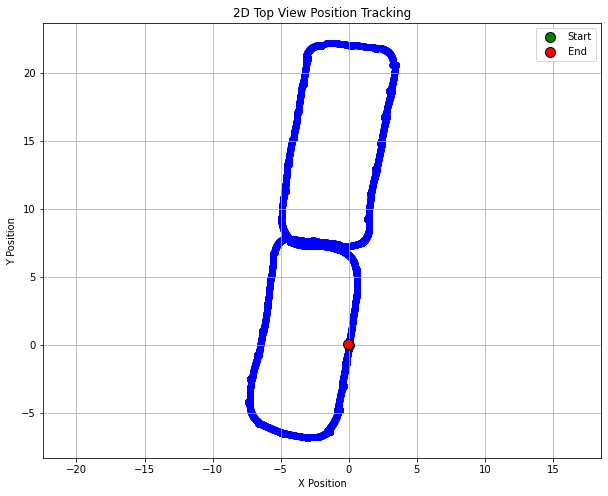

In [21]:
plot_position_tracking(x_h)

### Batch part

In [22]:
init_x = None
init_quat = None
init_P = None
n = 750
num_batches = len(u[0]) // n
xhs = None

for i in range(num_batches + 1):
    # print(f'batch #{i+1}')
    ui = u[:, i*n: (i+1)*n]
    zupti , logLi = ins.detector_adaptive(ui)
    # zupti , logLi = zupt[:, i*n: (i+1)*n] , logL[:, i*n: (i+1)*n]
    x_h, _, quat, P = ins.baseline(ui, zupti, logLi, True, init_x, init_quat, init_P)
    if xhs is None:
        xhs = x_h
    else:
        xhs = np.hstack((xhs, x_h))
    init_x = x_h[:, -1]
    init_quat = quat
    init_P = P


In [23]:
xhs.shape

(9, 11900)

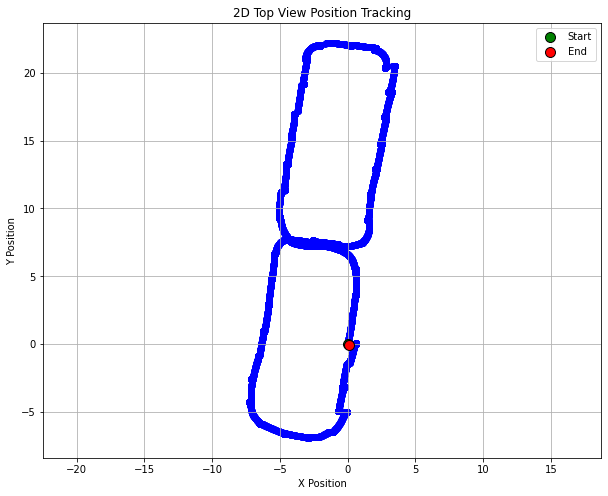

In [24]:
plot_position_tracking(xhs)

In [25]:
xhs[:3, -1]

array([ 0.09137775, -0.08015138,  0.53055358])